# Context
This notebook drives the training process for different models.

In [13]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [14]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert

# Models

## Setup

In [15]:
import torch.nn as nn
import torch.optim as optim

In [16]:
TRAIN_classes = 'two-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "seq_len" : 1,
  "PH2" : False,
  "input_dim" : 72,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  

}

train_config = {
  "device" : bert.device,
  "arch" : sup.TRAIN_BERT_CODE,
  "loadable" : bert.BERT_BASE,
  "optimizer" : optim.AdamW,
  "lr" : 2e-5,
  "weight_decay" : 1e-4,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 100
}


In [17]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, 
                  train_config=train_config)

In [18]:
model.fit(verbose=True, perfect=True)

0.9765625


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


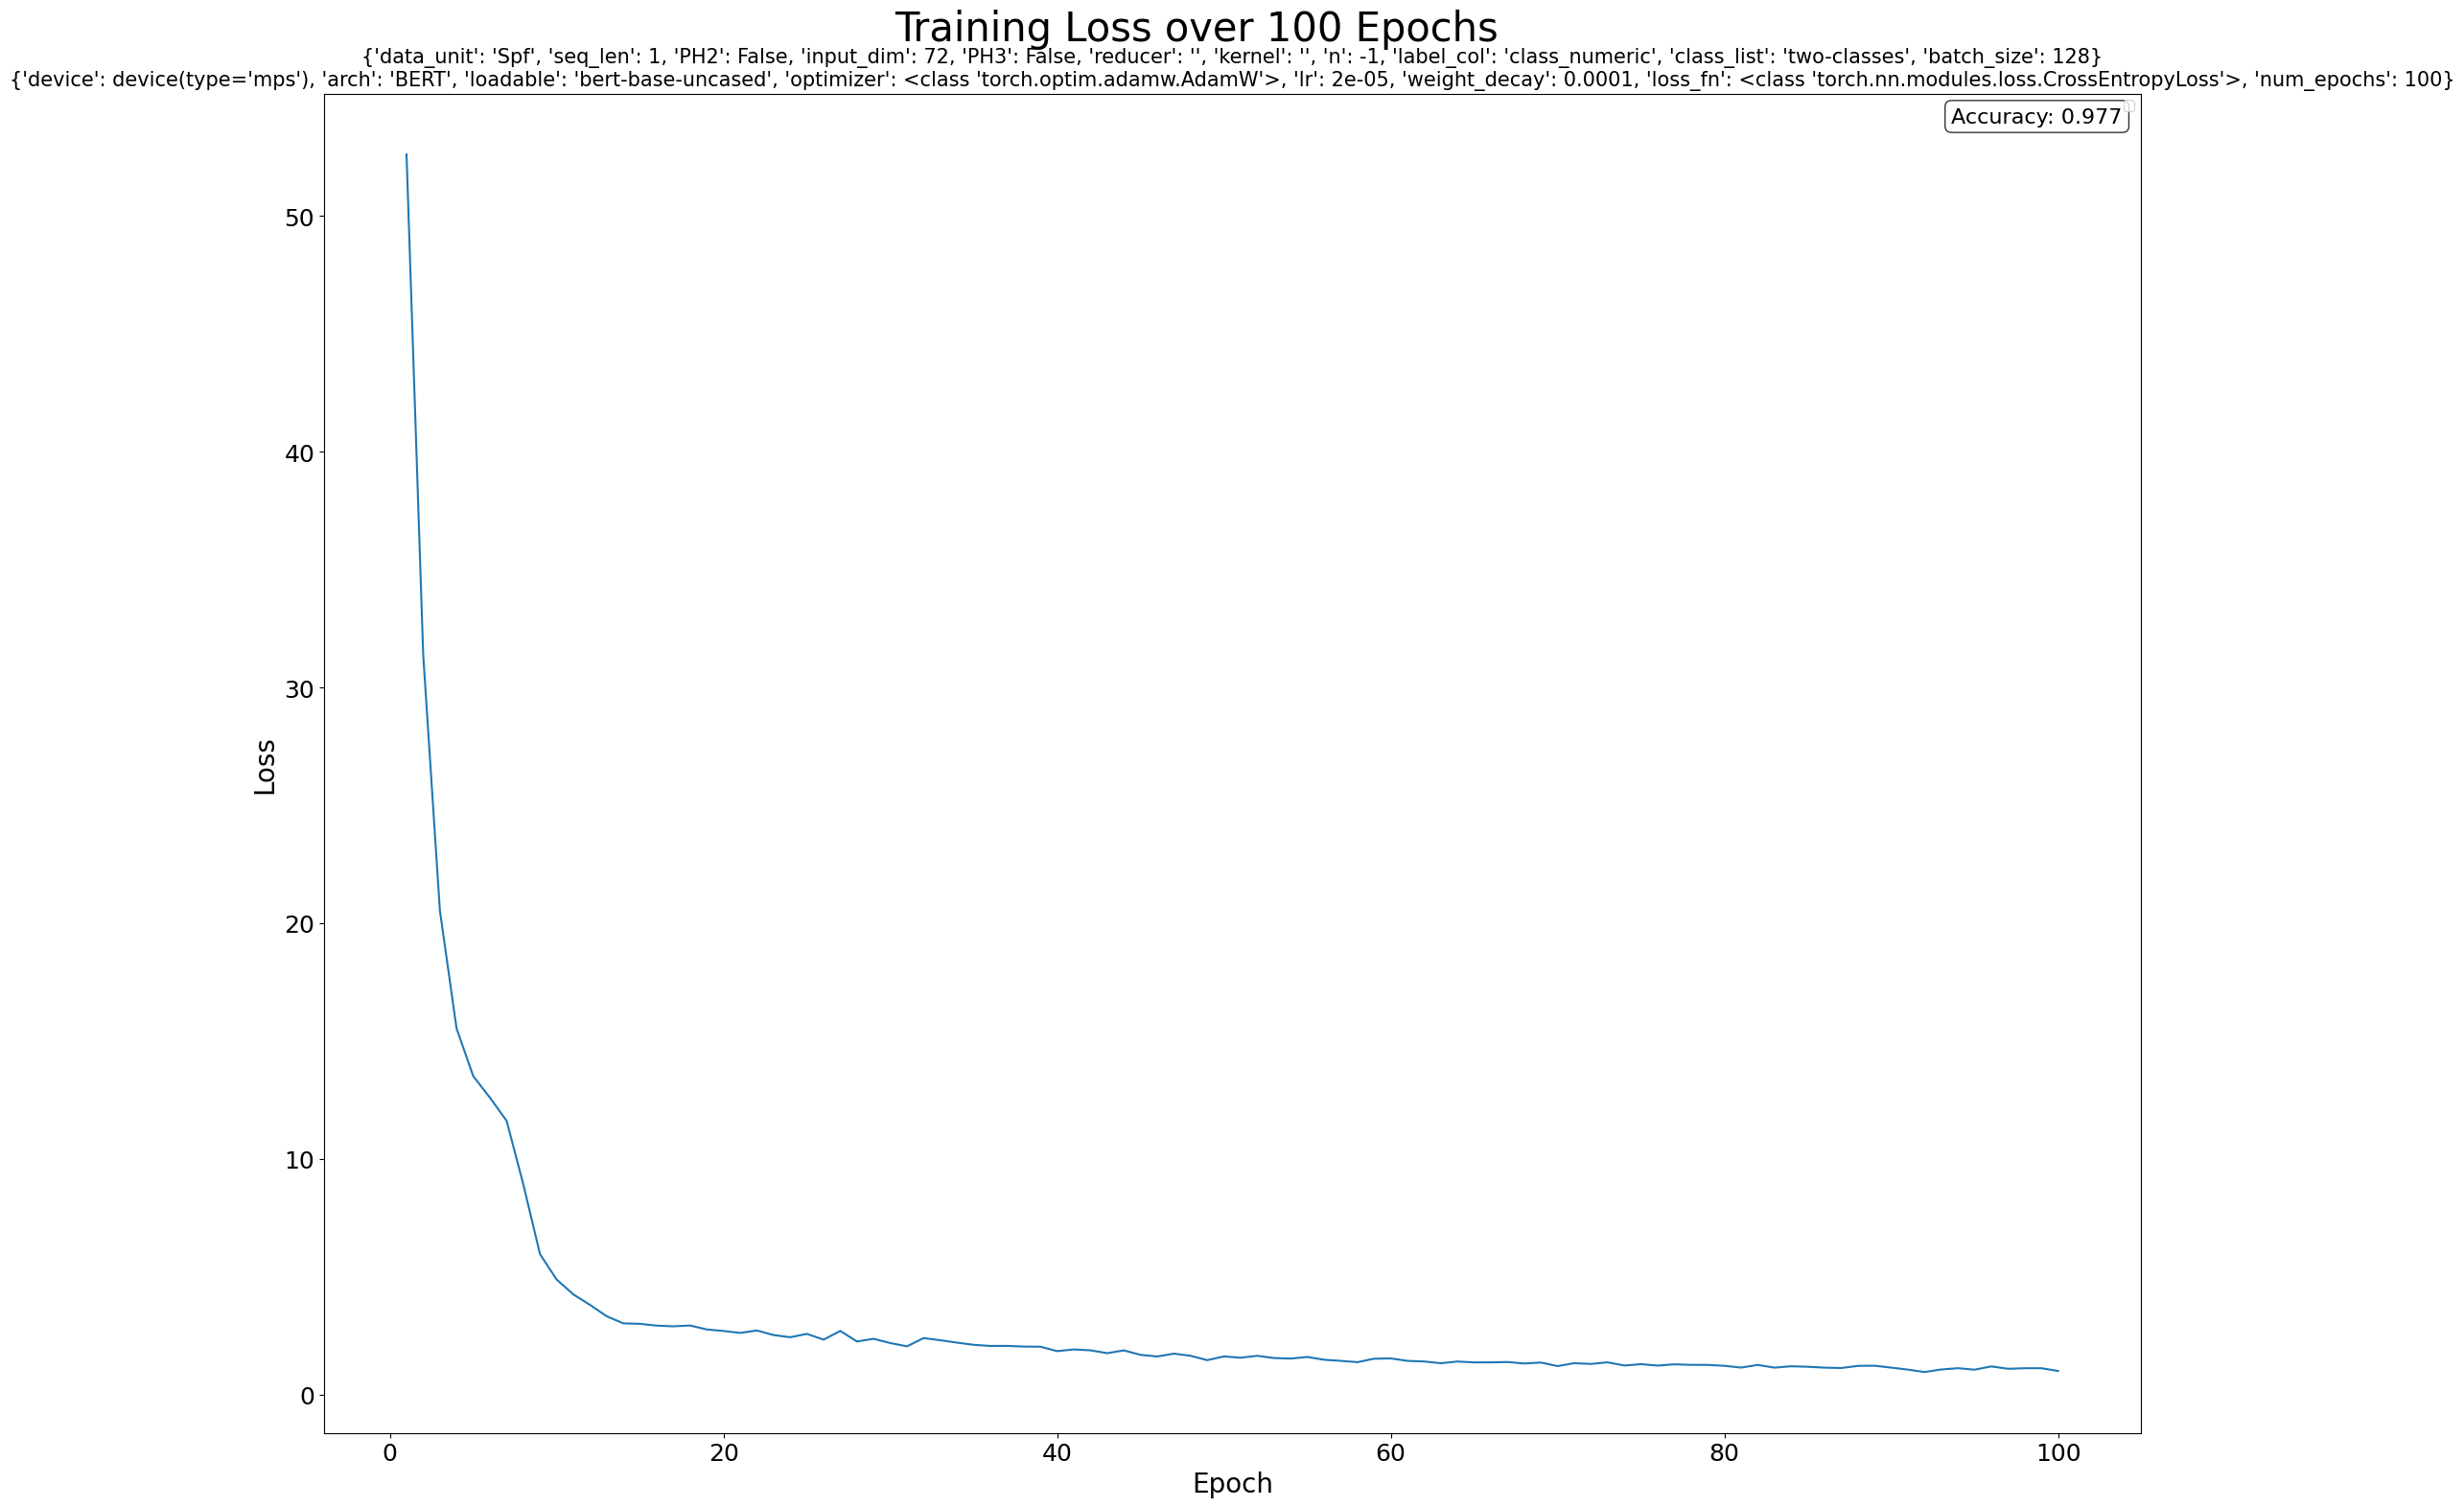

In [19]:
model.score()
print(model.accuracy)
model.show_loss()

In [20]:
del model